<a href="https://colab.research.google.com/github/WinnieAnyoso/week4IP/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2020_05_Winnie_Anyoso_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# week 4 IP
 
In this week's independent project, you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time by solving for the following research question;

Research Question

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.
 
 Data Sets Provided 
 1. https://drive.google.com/a/moringaschool.com/file/d/13DXF2CFWQLeYxxHFekng8HJnH_jtbfpN/view?usp=sharing



# 1. Importing **libraries**



In [0]:
# required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
% matplotlib inline 


# Loading datasets **bold text**

In [37]:
# Dataset 
df = pd.read_csv('Autolib_dataset (2).csv')
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


# **Exploration**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [39]:
#samples from the data set 
df.sample(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
3491,4 Rue Louis SallÃ©,1,1,0,0,0,nonexistent,Limeil-BrÃ©vannes,NaN,limeilbrevannes-louissalle-4,SPACE,"48.75014, 2.489249",94450,Limeil-BrÃ©vannes/Louis SallÃ©/4,operational,NaN,3,full_station,ok,operational,2018,4,3,1,46
3346,21 rue Pierre Brossolette,0,0,0,0,0,nonexistent,Levallois-Perret,"Station en parking (niv -1), accÃ¨s rue Marjolin",levalloisperret-marjolin-parking,PARKING,"48.89545, 2.29222",92300,Levallois-Perret/Marjolin/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,6,14,13
3841,2 Avenue LeÌon Blum,4,4,0,0,0,nonexistent,Le Plessis-Robinson,NaN,leplessisrobinson-leonblum-2,SPACE,"48.775973, 2.2557776",92350,Le Plessis-Robinson/LeÌon Blum/2,operational,NaN,2,full_station,ok,broken,2018,4,5,14,0
1734,9 boulevard Bourdon,1,1,0,0,2,operational,Paris,NaN,paris-bourdon-9,STATION,"48.8484226, 2.366004",75004,Paris/Bourdon/9,operational,NaN,4,station,ok,nonexistent,2018,4,1,14,30
2883,10 Rue Anizan Cavillon,0,0,0,0,0,nonexistent,Le Bourget,NaN,lebourget-anizancavillon-10,SPACE,"48.9350451, 2.424831",93350,Le Bourget/Anizan Cavillon/10,broken,NaN,0,full_station,closed,broken,2018,4,8,9,0


In [46]:
# statistical summary 
df.describe()

,cars,bluecar counter,utilib counter,utilib 1.4 counter,charge slots,postal code,slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [40]:
# the shape 
df.shape

(5000, 25)

# **Data Cleaning**

In [45]:
#changing the columns to lower case

df.columns = map(str.lower, df.columns)
columns = ['address', 'cars', 'bluecar counter', 'utilib counter', 'utilib 1.4 counter', 'charge slots', 'charging status', 'city', 'displayed comment','id', 'kind', 'geo point', 
           'postal code',	'public name', 'rental status', 'scheduled at', 'slots', 'station type', 'status', 'subscription status', 'year', 'month', 'day', 'hour','minute']
df.columns = columns
df.columns

Index(['address', 'cars', 'bluecar counter', 'utilib counter',
       'utilib 1.4 counter', 'charge slots', 'charging status', 'city',
       'displayed comment', 'id', 'kind', 'geo point', 'postal code',
       'public name', 'rental status', 'scheduled at', 'slots', 'station type',
       'status', 'subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [47]:

# Null values
df.isnull().sum()

address                   0
cars                      0
bluecar counter           0
utilib counter            0
utilib 1.4 counter        0
charge slots              0
charging status           0
city                      0
displayed comment      4889
id                        0
kind                      0
geo point                 0
postal code               0
public name               0
rental status             0
scheduled at           4953
slots                     0
station type              0
status                    0
subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [48]:
# dropping columns with many null values 
df.drop(['displayed comment', 'scheduled at'], axis = 1, inplace = True)
df.isnull().sum()


address                0
cars                   0
bluecar counter        0
utilib counter         0
utilib 1.4 counter     0
charge slots           0
charging status        0
city                   0
id                     0
kind                   0
geo point              0
postal code            0
public name            0
rental status          0
slots                  0
station type           0
status                 0
subscription status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

In [49]:
# Check for duplicated data
df.duplicated().any()

False



#  **Data Analysis** 








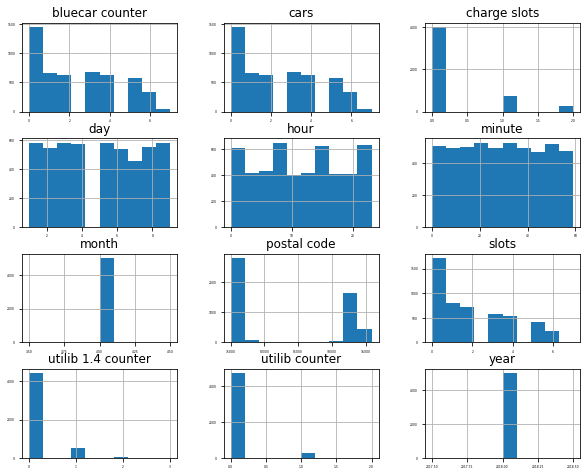

In [70]:
df.hist(figsize=(10,8), sharex=False, sharey=False, xlabelsize=3, ylabelsize=3)
plt.show()

* Day, hour and minute columns are uniformly skewed
* utilib 1.4 counter and utilib counter columns are skewed to the right. 

In [61]:
#● Identify the most popular hour of the day for picking up a shared electric car (Bluecar) 
#in the city of Paris over the month of April 2018. combined.groupby(['date', 'product'])['product'].count().sort_values(ascending = False)
b=df.groupby(['hour', 'city'])['bluecar counter'].count().sort_values(ascending = False)
b.head(10)

hour  city 
21    Paris    147
8     Paris    128
16    Paris    128
3     Paris    125
6     Paris    124
2     Paris    123
9     Paris    122
7     Paris    121
10    Paris    121
12    Paris    120
Name: bluecar counter, dtype: int64

* the most popular hour of the day for picking up a
shared electric car (Bluecar) in the city of Paris over the month of April 2018 is 21 hours


In [65]:
# What station is the most popular?
#overal
df.groupby('city')['city'].count().sort_values(ascending = False)



city
Paris                    2816
Nanterre                  127
Issy-les-Moulineaux       101
CrÃ©teil                   88
Rueil-Malmaison            88
                         ... 
Saclay                      4
Le PrÃ©-Saint-Gervais       4
Clichy la garenne           3
Saint-Maur                  2
Epinay-sur-Seine            1
Name: city, Length: 88, dtype: int64

* paris was the most popular station

In [68]:
#What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
#Overall?
df.groupby(['hour','postal code'])['bluecar counter'].count().sort_values(ascending = False)



hour  postal code
6     75016          19
16    75015          18
11    75017          18
22    75015          16
21    75014          16
                     ..
15    93600           1
7     78280           1
      78150           1
      78000           1
23    95880           1
Name: bluecar counter, Length: 1605, dtype: int64

* the most popular adress was 75016 and it belongs to the most popular station ie Paris

In [69]:
#Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 
df.groupby(['hour','postal code'])['utilib 1.4 counter'].count().sort_values(ascending = False)

hour  postal code
6     75016          19
16    75015          18
11    75017          18
22    75015          16
21    75014          16
                     ..
15    93600           1
7     78280           1
      78150           1
      78000           1
23    95880           1
Name: utilib 1.4 counter, Length: 1605, dtype: int64

* the results remain the same 